In [1]:
# By Ismael Valenzuela (@aboutsecurity / @thinkredactblue)

# https://medium.com/@n0psl1de/mitre-att-ck-via-jupyter-notebooks-for-beginners-838bb380145c
# https://attack.mitre.org/resources/working-with-attack/

In [2]:
import pandas as pd
import janitor as jn
import plotly.express as px

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
url_attack = 'https://attack.mitre.org/docs/enterprise-attack-v13.1/enterprise-attack-v13.1.xlsx'
df_datasources = pd.read_excel(url_attack, sheet_name='datasources')
df_tactics = pd.read_excel(url_attack, sheet_name='tactics')
df_techniques = pd.read_excel(url_attack, sheet_name='techniques')
df_relationships = pd.read_excel(url_attack, sheet_name='relationships')
df_mitigations = pd.read_excel(url_attack, sheet_name='mitigations')
df_software = pd.read_excel(url_attack, sheet_name='software')
df_groups = pd.read_excel(url_attack, sheet_name='groups')

In [4]:
df_datasources = jn.clean_names(df_datasources)
df_tactics = jn.clean_names(df_tactics)
df_techniques = jn.clean_names(df_techniques)
df_relationships = jn.clean_names(df_relationships)
df_mitigations = jn.clean_names(df_mitigations)
df_software = jn.clean_names(df_software)
df_groups = jn.clean_names(df_groups)

In [5]:
# Convert string of data sources to a list of data sources
df_techniques['data_sources'] = df_techniques['data_sources'].str.split(",")
# Use Pandas explode function to expand the list of data sources to separate rows
df_techniques = df_techniques.explode('data_sources').reset_index(drop=True)
# Get the technique ID and data sources then drop duplicate rows; place the output in a new data frame called 'viz_data' that'll be used for our visualization.
viz_data = df_techniques[['data_sources','id']].drop_duplicates().groupby(['data_sources']).size().reset_index()
# Rename column to 'count' in preparation for visualization
viz_data.columns = viz_data.columns.map(str)
viz_data = viz_data.rename(columns={"0": "count"})

In [9]:
fig_te_by_ds  = px.bar(viz_data.sort_values('count', ascending=False).head(50), x='data_sources', y='count', title='MITRE ATT&CK: Sub-Technique Count by Data Source (Top 25)', labels={'count':'Technique Count', 'data_sources':'Data Source'})
fig_te_by_ds.show()

In [32]:
df_software_malware = df_software.loc[df_software['type'] == 'malware']

df_software_malware.describe()


,version
count,635.000000
mean,1.197008
std,0.345599
min,1.000000
25%,1.000000
50%,1.100000
75%,1.200000
max,3.100000


In [36]:
df_groups_APT28 = df_groups.loc[df_groups['name'] == 'APT28']

df_groups_APT28

,id,name,description,url,created,last_modified,version,contributors,associated_groups,associated_groups_citations,relationship_citations
7,G0007,APT28,[APT28](https://attack.mitre.org/groups/G0007)...,https://attack.mitre.org/groups/G0007,31 May 2017,26 March 2023,4.0,"Drew Church, Splunk; Emily Ratliff, IBM; Richa...","Fancy Bear, Group 74, IRON TWILIGHT, Pawn Stor...",(Citation: Crowdstrike DNC June 2016)(Citation...,"(Citation: Securelist Sofacy Feb 2018),(Citati..."


In [100]:
df_relationships_APT28 = df_relationships.loc[df_relationships['source_name'] == 'APT28']

df_relationships_APT28 = df_relationships_APT28.loc[df_relationships_APT28['target_type'] == 'software']

df_relationships_APT28

,source_id,source_name,source_type,mapping_type,target_id,target_name,target_type,mapping_description
3724,G0007,APT28,group,uses,S0045,ADVSTORESHELL,software,(Citation: Kaspersky Sofacy)(Citation: Securel...
3725,G0007,APT28,group,uses,S0023,CHOPSTICK,software,(Citation: FireEye APT28)(Citation: Kaspersky ...
3726,G0007,APT28,group,uses,S0137,CORESHELL,software,(Citation: FireEye APT28)(Citation: Securework...
3727,G0007,APT28,group,uses,S0351,Cannon,software,(Citation: Unit42 Cannon Nov 2018)(Citation: U...
3728,G0007,APT28,group,uses,S0243,DealersChoice,software,(Citation: Sofacy DealersChoice)(Citation: Sec...
3729,G0007,APT28,group,uses,S0134,Downdelph,software,(Citation: ESET Sednit Part 3)(Citation: Secur...
3730,G0007,APT28,group,uses,S0502,Drovorub,software,(Citation: NSA/FBI Drovorub August 2020)
3731,G0007,APT28,group,uses,S0193,Forfiles,software,(Citation: Überwachung APT28 Forfiles June 2015)
3732,G0007,APT28,group,uses,S0410,Fysbis,software,(Citation: Fysbis Palo Alto Analysis)
3733,G0007,APT28,group,uses,S0135,HIDEDRV,software,(Citation: ESET Sednit Part 3)


In [127]:
df_relationships_APT28.count()

source_id              26
source_name            26
source_type            26
mapping_type           26
target_id              26
target_name            26
target_type            26
mapping_description    26
dtype: int64

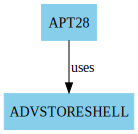

In [125]:

import graphviz
f = graphviz.Digraph(filename = "output/attacktree.gv")

names = ["1","2"]
positions = [df_relationships_APT28['source_name'].iloc[0],
             df_relationships_APT28['target_name'].iloc[0]]
for name, position in zip (names, positions):
     f.node(name, position, shape = "record", style = "filled", color = "skyblue")
 
#Specify edges
f.edge("1","2", label=" uses");

f